# Matches: Three dynamic programming solutions
## Asynchronous Value Iteration
### Description
There are 20 matches on the table. In each round, the players consecutively chose to pick one or two matches from the table, until remain any matches on the table. The player who takes away the last match(es) wins. What is the winner strategy?
http://matek.fazekas.hu/index.php?option=com_content&view=article&id=76:szakkori-anyag-6-elokeszito-hrasko-andras-2002-2003&catid=20&Itemid=134

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Asynchronous Value Iteration without functions (solution 1)
The term asynchronous means that we use an in-place algorithm for updating the value function, and we don't keep the original values of $V_{k}(s)$ until the end of updating the whole vector $V_{k+1}(s)$. 
### $\underline {Pseudocode}$:
Initialize array V arbitrarily (e.g. V(s)=0 $\forall$ s)  
Repeat  
$\qquad$ $\Delta \leftarrow $ 0  
$\qquad$ for each $s \in S:$  
$\qquad\qquad$ v$  \leftarrow $ V(s)  
$\qquad\qquad$ V(s)  $\leftarrow \max_{a} \sum_{s',r} p(s',r| s,a)[r+ \gamma V(s')]$.  
$\qquad\qquad$ $\Delta  \leftarrow  max (\Delta, |v- V(s)|)$  
Untill $\Delta< \theta$  
Output a deterministic policy , $\pi=\pi^{*}$, such that $\pi(s) = argmax_{a} \sum_{s',r} p(s',r| s,a)[r+ \gamma V(s')]$

# Notes:
In the case when we have rewards only at the terminal states, instead of including the rewards, we can modify the terminal values $\gamma V(s')$ of value function, to $r+ \gamma V(s')$ because the value of $V$ at the terminal state will never be updated by the algorithm. In this example, howewer, it is not enough to modify the value function at the last state, because the return depend on which player get there. For the sake of the simple representation, we expand the set of states with an imaginary zero and two negative matches, and  we assume, that the game always ends with the step of the opponent, when there remain mo matches on the table, and possibly the number of matches might be negative. To assure that the players behave according to the original rules, we explicitly must prevent the players stepping to state -1 from state 1. In this representation, we have to initialize the value function to 1 at the states -2 and -1, and to 0 at state 0. The algorithm have to be modified not to update these values. 

## The optimal value function

iteration
iteration
[ 1.        1.        0.        1.        1.        0.5       1.        1.
  0.75      1.        1.        0.875     1.        1.        0.9375    1.
  1.        0.96875   1.        1.        0.984375  1.        1.      ]


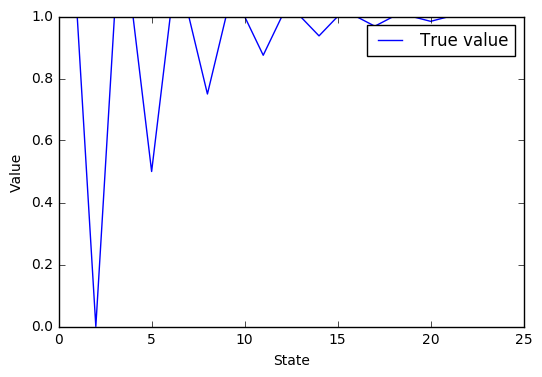

In [5]:
N_MATCHES = 20
trueStateValues = np.zeros(N_MATCHES+3)
trueStateValues[0:2]=1
STATES = np.arange(0, N_MATCHES+ 3) 
def possibleActions(state):
    """returns the possible actions for a given state, 
    with the distribution of possible actions"""
    if state != 1:
        return [-1, -2], [0.5, 0.5]
    else:
        return [-1], [1]
while True:
    print( "iteration")
    oldTrueStateValues = np.copy(trueStateValues)
    for state in STATES[3:]:
        maxExpextedReturn=-np.inf
        for action in possibleActions(state)[0]:
            expected_return = 0
            for opp_action_ind in np.arange(0,len(possibleActions(state + action)[0])):
                newState = state + action + possibleActions(state + action)[0][opp_action_ind]
                expected_return += possibleActions(state + action)[1][opp_action_ind]*trueStateValues[newState]
            if expected_return > maxExpextedReturn:
                maxExpextedReturn = expected_return
        trueStateValues[state] = maxExpextedReturn       
    error = np.sum(np.abs(oldTrueStateValues - trueStateValues))
    if error < 1e-4:
        break

def figure():
    plt.figure(0)
    plt.plot(STATES, trueStateValues, label='True value')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()
figure()
print(trueStateValues)

# Optimal Policy
The next code determines greedy policy w.r.t. value function saved in `trueStateValues` using $$\pi(s) = argmax_{a} \sum_{s',r} p(s',r| s,a)[r+ \gamma V(s')]$$

In [6]:
policy=np.zeros(N_MATCHES+3)
for state in STATES[3:]:
    maxExpextedReturn=-np.inf
    for action in possibleActions(state)[0]:
        expected_return = 0
        for opp_action_ind in np.arange(0,len(possibleActions(state + action)[0])):
            newState = state + action + possibleActions(state + action)[0][opp_action_ind]
            expected_return += possibleActions(state + action)[1][opp_action_ind]*trueStateValues[newState]
        if expected_return > maxExpextedReturn:
            maxExpextedReturn = expected_return
            policy[state]=action
print(policy)

[ 0.  0.  0. -1. -2. -1. -1. -2. -1. -1. -2. -1. -1. -2. -1. -1. -2. -1.
 -1. -2. -1. -1. -2.]


# Value Iteration with Smart Opponent

16.0
0.0
[ 1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  1.  0.  1.  1.  0.]


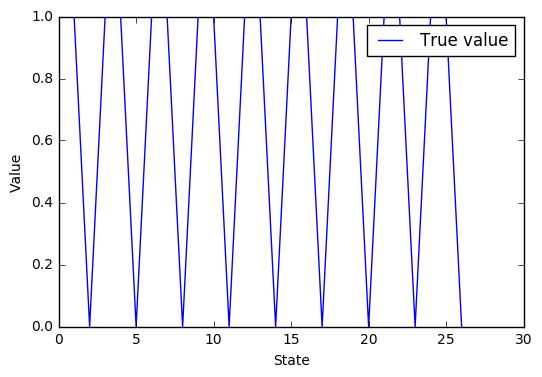

In [7]:
N_MATCHES = 24
trueStateValues = np.zeros(N_MATCHES+3)
trueStateValues[0:2]=1
STATES = np.arange(0, N_MATCHES+ 3) 
def possibleActions(state, smart = False):
    """returns the possible actions for a given state, 
    with the distribution of possible actions"""
    if smart == False:
        if state != 1:
            return [-1, -2], [0.5, 0.5]
        else:
            return [-1], [1]
    else:
        if state != 1:
            return [-max(1,((state-2)%3))], [1]
        else:
            return [-1], [1]
while True:
    oldTrueStateValues = np.copy(trueStateValues)
    for state in STATES[3:]:
        maxExpextedReturn=-np.inf
        for action in possibleActions(state)[0]:
            expected_return = 0
            
            for opp_action_ind in np.arange(0,len(possibleActions(state + action, True)[0])):

                newState = state+action + possibleActions(state + action, True)[0][opp_action_ind]
                expected_return += possibleActions(state + action, True)[1][opp_action_ind]*trueStateValues[newState]
            if expected_return > maxExpextedReturn:
                maxExpextedReturn = expected_return
        trueStateValues[state] = maxExpextedReturn       
    error = np.sum(np.abs(oldTrueStateValues - trueStateValues))
    print(error)
    if error < 1e-4:
        break

def figure():
    plt.figure(0)
    plt.plot(STATES, trueStateValues, label='True value')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()
figure()
print(trueStateValues)

## The same with OOP  (solution 2)

The `maxExpectedReturn` function gives the value and action index of $$\max_{a} \sum_{s',r} p(s',r| s,a)[r+ \gamma V(s')]$$.

In [8]:
# use these to construct transition mx by using function newStateDistr.
from scipy import sparse
from numpy import array
I = array([0,3,1,0,3])
J = array([0,3,1,2,1])
V = array([4,5,7,9,3])
A = sparse.coo_matrix((V,(I,J)),shape=(4,4))
A.toarray()                      

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 3, 0, 5]])

[ 0.9921875   1.          1.          0.99609375  1.          1.
  0.99804688  1.          1.          0.99902344  1.          1.
  0.99951172  1.          1.          0.99975586  1.          1.
  0.99987793  1.          1.          0.99993896  1.        ]
[ 0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.
  0.  0.  1.  0.  0.]


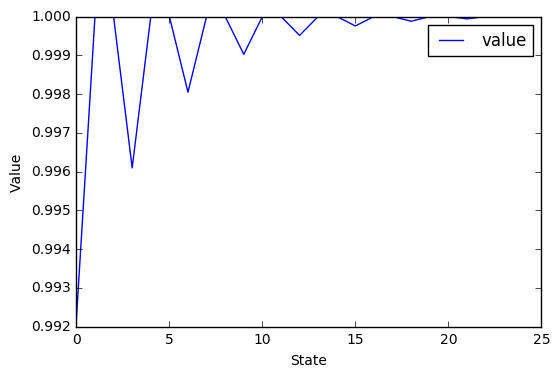

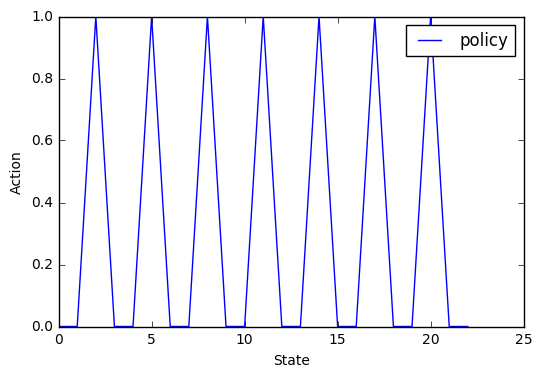

In [8]:
N_MATCHES = 20
trueStateValues = np.zeros(N_MATCHES+3)
initialPol = np.zeros(N_MATCHES+3)
trueStateValues[0:2]=1
STATES = np.arange(0, N_MATCHES+ 3) 
class Model():
    def __init__(self, states):
        self.states=states
    def newStatesDistr(self, state, action): #returns distribution p(s',r|s,a)
        newStates=[]
        sprob=[]
        for opp_action_ind in np.arange(0,len(self.possibleActions(state)[0])):
            newState = state + action + self.possibleActions(state)[0][opp_action_ind]
            newStates.append(newState)
            sprob.append(self.possibleActions(state)[1][opp_action_ind])
        return newStates, sprob
    def possibleActions(self, state):
        """returns the possible actions for a given state, 
        with the distribution of possible actions"""
        if state != 1:
            return [-1, -2], [0.5, 0.5]
        else:
            return [-1], [1]
class ValueFunction():
    def __init__(self, values, model,pol):
        self.values = values
        self.model = model
        self.pol = pol
    def updateVF(self, state): #updates self.values property and returns best action index
        
        maxExpectedReturn = -np.inf
        maxERInd = 0
        for action_ind in np.arange(0,len(self.model.possibleActions(state)[0])):
            s=self.model.newStatesDistr(state, self.model.possibleActions(state)[0][action_ind])[0]
            p=self.model.newStatesDistr(state, self.model.possibleActions(state)[0][action_ind])[1]
            p=np.array(p)
            V=[self.values[i] for i in s]
            V=np.array(V)
            expected_return=np.dot(p,V)
            if expected_return > maxExpectedReturn:
                maxExpectedReturn = expected_return
                maxERInd = action_ind
        self.values[state] = maxExpectedReturn  #updates self.values property
        return maxERInd
    
    def valueIteration(self):
        while True:
            oldTrueStateValues = np.copy(self.values)
            for state in self.model.states[3:]:
                self.updateVF(state)
            error = np.sum(np.abs(oldTrueStateValues - self.values))
            if error < 1e-4:
                break
        for state in STATES:
            self.pol[state]=self.updateVF(state)
        
m = Model(STATES)   
v=ValueFunction(trueStateValues,m, initialPol)
v.valueIteration()
print(v.values)
def figure():
    plt.figure(0)
    plt.plot(STATES, v.values, label='value')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()
    plt.figure(1) 
    plt.plot(STATES, v.pol, label='policy')
    plt.xlabel('State')
    plt.ylabel('Action')
    plt.legend()    
    
    
figure()
print(v.pol)




In [10]:
help(v.updateVF)

Help on method updateVF in module __main__:

updateVF(self, state) method of __main__.ValueFunction instance



In [ ]:
policy=np.zeros(N_MATCHES+3)
for state in STATES:
    policy[state]=maxExpectedReturn(state)[1]
print(policy)

In [11]:
print(len(STATES))

23


In [12]:
print(len(trueStateValues))

23


## The same with functions  (solution 3)


In [13]:
N_MATCHES = 20
trueStateValues = np.zeros(N_MATCHES+3)
trueStateValues[0:2]=1
STATES = np.arange(0, N_MATCHES+ 3) 
def possibleActions(state):
    """returns the possible actions for a given state, 
    with the distribution of possible actions"""
    if state != 1:
        return [-1, -2], [0.5, 0.5]
    else:
        return [-1], [1]
def maxExpectedReturn(state):
    maxExpectedReturn = -np.inf
    maxERInd = 0
    agentPActions=possibleActions(state)[0]
    for action in agentPActions:
        expected_return = 0
        newState=state+action
        possibleOActions = possibleActions(newState)[0]
        distributionPActions = possibleActions(newState)[1]
        for opp_action_ind in np.arange(0,len(possibleOActions)):
            newStateAterOp = newState + possibleOActions[opp_action_ind]
            expected_return += distributionPActions[opp_action_ind]*trueStateValues[newStateAterOp]
        if expected_return > maxExpectedReturn:
            maxExpectedReturn = expected_return
            maxERInd = action
    return maxExpectedReturn, maxERInd

In [14]:
while True:
    oldTrueStateValues = np.copy(trueStateValues)
    for state in STATES[3:]:
        trueStateValues[state] = maxExpectedReturn(state)[0]       
    error = np.sum(np.abs(oldTrueStateValues - trueStateValues))
    if error < 1e-4:
        break

## Optimal policy:

In [15]:
policy=np.zeros(N_MATCHES+3)
for state in STATES:
    policy[state]=maxExpectedReturn(state)[1]
print(policy)

[-1. -1. -1. -1. -2. -1. -1. -2. -1. -1. -2. -1. -1. -2. -1. -1. -2. -1.
 -1. -2. -1. -1. -2.]


[ 1.        1.        0.        1.        1.        0.5       1.        1.
  0.75      1.        1.        0.875     1.        1.        0.9375    1.
  1.        0.96875   1.        1.        0.984375  1.        1.      ]


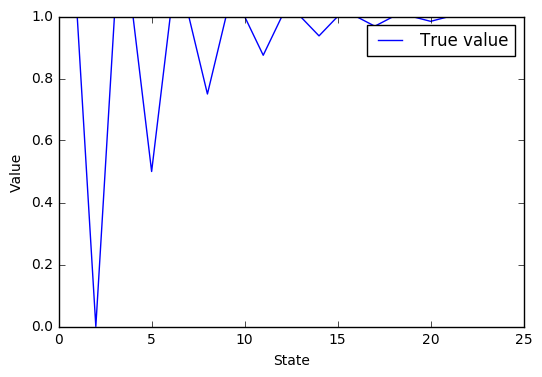

In [16]:
def figure9_1():
    plt.figure(0)
    plt.plot(STATES, trueStateValues, label='True value')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()
figure9_1()
print(trueStateValues)